In [21]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [22]:
# Subplots with Bar Charts (2.13.1) - Problem
# Matplotlib Format Charts
# Problem Statement:
# Create a subplot with 2 rows and 1 column:

# In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
# In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
# Use tight_layout() to adjust the spacing between subplots.

In [23]:
df[df['job_location'].isna()]                          ## Checking if NaN Values exist in the dataframe

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
43,Senior Data Engineer,Sr SQL Database Engineer with Data Warehouse /...,NaN,via LinkedIn,Contractor,False,"Texas, United States",2023-09-13 13:06:55,True,False,United States,hour,NaN,97.5,Phaxis,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
568,Data Engineer,Data Engineer,NaN,via LinkedIn,Full-time,False,"Illinois, United States",2023-10-20 13:13:12,False,False,United States,NaN,NaN,NaN,"Susquehanna International Group, LLP (SIG)","[shell, python, mysql, mariadb, oracle, hadoop...","{'cloud': ['oracle'], 'databases': ['mysql', '..."
814,Senior Data Scientist,"Senior Data Scientist (Greater Boston Area, MA)",NaN,via Built In Boston,Full-time,False,"New York, United States",2023-04-14 13:02:26,False,False,United States,NaN,NaN,NaN,Deloitte,"[python, aws, azure, gcp, keras, tensorflow, p...","{'cloud': ['aws', 'azure', 'gcp'], 'libraries'..."
842,Data Engineer,Data Engineer,NaN,via LinkedIn,Full-time,False,"Texas, United States",2023-10-23 13:05:37,True,False,United States,hour,NaN,55.0,Agility Partners,"[nosql, sql, hadoop]","{'libraries': ['hadoop'], 'programming': ['nos..."
1206,Data Analyst,SQL Data Analyst,NaN,via LinkedIn,Full-time,False,"New York, United States",2023-04-28 13:00:40,True,False,United States,NaN,NaN,NaN,Robert Half,"[sql, t-sql, sql server, azure, ssrs, ssis]","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779454,Data Analyst,Data Analyst - Banking,NaN,via LinkedIn,Full-time,False,Georgia,2023-12-27 05:27:27,False,False,United States,NaN,NaN,NaN,Randstad USA,"[sql, ms access, excel]","{'analyst_tools': ['ms access', 'excel'], 'pro..."
780208,Cloud Engineer,광고 플랫폼 개발,NaN,via Trabajo.org - 작업 검색,Full-time,False,South Korea,2023-01-30 05:33:19,False,False,South Korea,NaN,NaN,NaN,티맵모빌리티,"[nosql, mongodb, mongodb, java, kotlin, redis,...","{'cloud': ['oracle', 'aws'], 'databases': ['mo..."
780884,Data Engineer,Data Engineer,NaN,via BeBee,Full-time,False,South Korea,2023-01-02 07:09:34,False,False,South Korea,NaN,NaN,NaN,Class101,"[aws, airflow, kafka, docker]","{'cloud': ['aws'], 'libraries': ['airflow', 'k..."
781197,Business Analyst,Analyst,NaN,via LinkedIn,Full-time,False,"New York, United States",2023-10-22 06:00:17,False,False,United States,NaN,NaN,NaN,Coffman,"[python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."


In [24]:
df = df.dropna(subset='job_location')                  ## Removing NaN values from the subset

In [25]:
df[df['job_location'].isna()]                          ## Confirming No NaN values Exist

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills


In [ ]:
# Top 3 job locations by the number of job postings.

# Making a copy
df_jobp = df.copy()                                   

## Grouping the job_location with number of job_titles
df_jobp_final = df_jobp.groupby('job_location')['job_title_short'].count().sort_values(ascending=False).head(3)

## Making it back to a Dataframe
df_jobp_final = df_jobp_final.reset_index(name = 'Count')

## Displaying the Dataframe
df_jobp_final

,job_location,Count
0,Anywhere,63850
1,Singapore,20572
2,"Bengaluru, Karnataka, India",10714


In [ ]:
# Top 3 job titles by the number of job postings.

df_jobt = df.copy()
df_jobt = df_jobt.groupby('job_title_short')['job_title_short'].count().sort_values(ascending=False).head(3)
df_jobt_final = df_jobt.reset_index(name = 'Count')
df_jobt_final

,job_title_short,Count
0,Data Engineer,169134
1,Data Analyst,159155
2,Data Scientist,145620


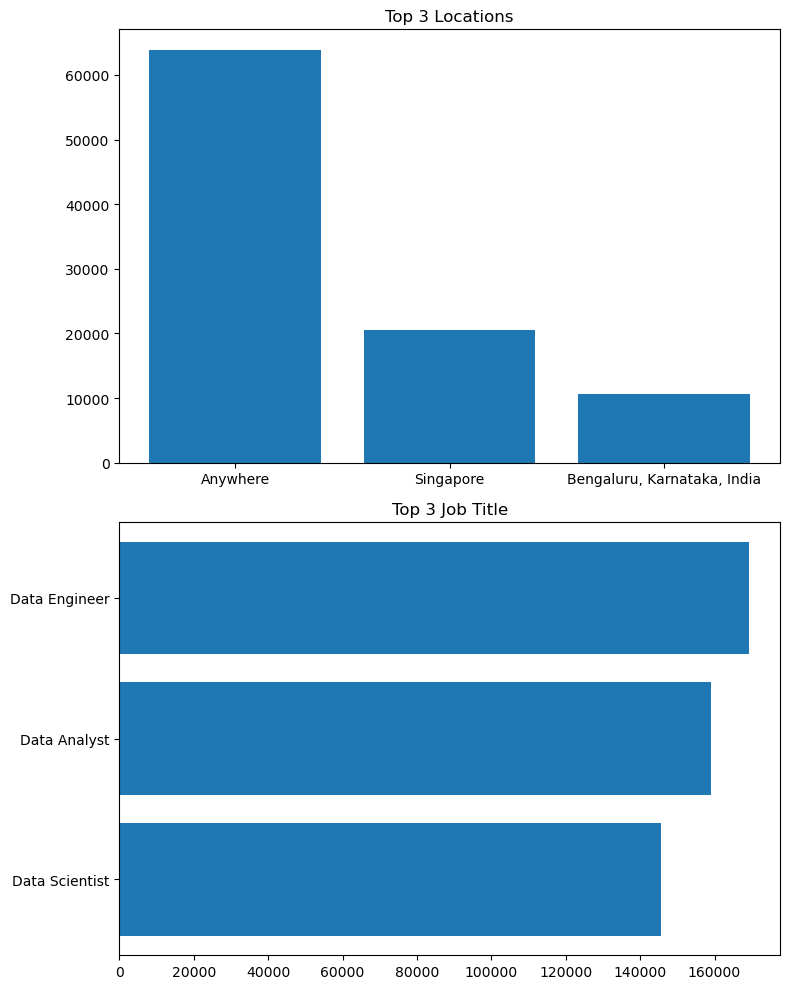

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8, 10))


ax[0].bar(df_jobp_final['job_location'],df_jobp_final['Count'])
ax[0].set_title('Top 3 Locations')

ax[1].barh(df_jobt_final['job_title_short'], df_jobt_final['Count'])
ax[1].set_title('Top 3 Job Title')

ax[1].invert_yaxis()
fig.tight_layout()
plt.show()


In [58]:
# Subplots with Job Titles by Schedule (2.13.2) - Problem
# Matplotlib Format Charts
# Problem Statement:
# Create a subplot with 2 rows and 2 columns:

# In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type 
# (Full-time, Part-time, Contractor, and Internship).
# Use fig.tight_layout() to adjust the spacing between subplots.
# Code Needed:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']


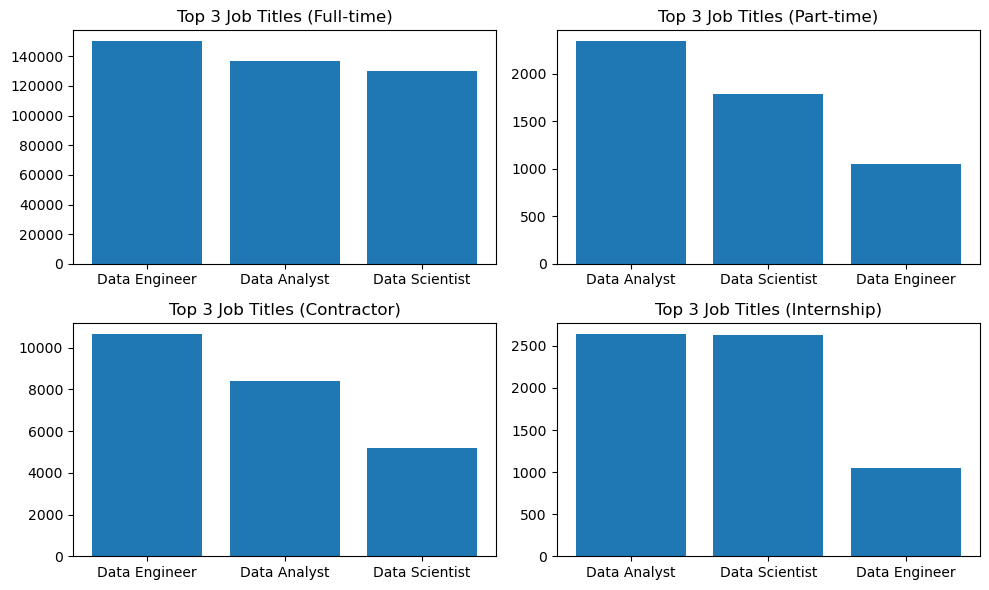

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))
df_s = df.copy()
for i, schedule in enumerate(schedules):
    df_schedule = df_s[df_s['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')
fig.tight_layout()
plt.show()

In [45]:
type(df)

pandas.core.frame.DataFrame

In [46]:
job_titles = df['job_title_short'].value_counts().head(3)

In [47]:
job_titles

job_title_short
Data Engineer     169134
Data Analyst      159155
Data Scientist    145620
Name: count, dtype: int64

In [ ]:
# Top Skills for Job Roles Subplots (2.13.3) - Problem
# Matplotlib Format Charts
# Problem Statement:
# Create a subplot with 3 rows and 1 column:

# In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
# Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.
# Code Needed:



df_s = df.copy()
df_s = df_s.explode('job_skills')

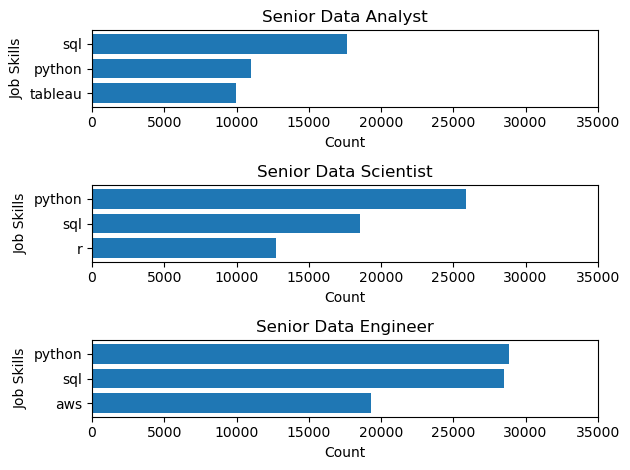

In [91]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
result = []
fig, ax = plt.subplots(3,1)
for i, r in enumerate(job_roles):
    df_j = df_s[df_s['job_title_short']==r]
    skill_count = df_j['job_skills'].value_counts().head(3)
    ax[i].barh(skill_count.index, skill_count.values)
    ax[i].set_title(r)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,35000)
fig.tight_layout()
plt.show()


In [63]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
